### INFRASTRUKTUR DAN PLATFORM SAINS DATA
#### Clara Edelways Kailuhu (1206230072 )

#### 1. Load data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_a = pd.read_csv('taylor_swift_spotify.csv')
data_a.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Welcome To New York (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,1,4WUepByoeqcedHoYhSNHRt,spotify:track:4WUepByoeqcedHoYhSNHRt,0.009420,0.757,0.610,0.000037,0.3670,-4.840,0.0327,116.998,0.685,70,212600
1,1,Blank Space (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,2,0108kcWLnn2HlH2kedi1gn,spotify:track:0108kcWLnn2HlH2kedi1gn,0.088500,0.733,0.733,0.000000,0.1680,-5.376,0.0670,96.057,0.701,71,231833
2,2,Style (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,3,3Vpk1hfMAQme8VJ0SNRSkd,spotify:track:3Vpk1hfMAQme8VJ0SNRSkd,0.000421,0.511,0.822,0.019700,0.0899,-4.785,0.0397,94.868,0.305,72,231000
3,3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,4,1OcSfkeCg9hRC2sFKB4IMJ,spotify:track:1OcSfkeCg9hRC2sFKB4IMJ,0.000537,0.545,0.885,0.000056,0.3850,-5.968,0.0447,92.021,0.206,71,235800
4,4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,5,2k0ZEeAqzvYMcx9Qt5aClQ,spotify:track:2k0ZEeAqzvYMcx9Qt5aClQ,0.000656,0.588,0.721,0.000000,0.1310,-5.579,0.0317,96.997,0.520,70,193289


In [5]:
# Hapus kolom yang tidak perlu
data_a =data_a.drop('Unnamed: 0', axis=1)

#### 2. Basic information about the dataset

In [7]:
data_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              530 non-null    object 
 1   album             530 non-null    object 
 2   release_date      530 non-null    object 
 3   track_number      530 non-null    int64  
 4   id                530 non-null    object 
 5   uri               530 non-null    object 
 6   acousticness      530 non-null    float64
 7   danceability      530 non-null    float64
 8   energy            530 non-null    float64
 9   instrumentalness  530 non-null    float64
 10  liveness          530 non-null    float64
 11  loudness          530 non-null    float64
 12  speechiness       530 non-null    float64
 13  tempo             530 non-null    float64
 14  valence           530 non-null    float64
 15  popularity        530 non-null    int64  
 16  duration_ms       530 non-null    int64  
dt

In [8]:
data_a.describe()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,11.184906,0.319247,0.585285,0.574609,0.004005,0.163492,-7.505434,0.055889,122.332311,0.397379,62.777358,239978.624528
std,7.981060,0.327043,0.113121,0.191565,0.033163,0.142263,2.939040,0.070300,30.000272,0.199589,15.224702,46119.983031
min,1.000000,0.000184,0.243000,0.118000,0.000000,0.035700,-17.932000,0.023100,68.097000,0.037400,32.000000,83253.000000
25%,5.000000,0.036250,0.516000,0.443000,0.000000,0.096600,-9.222000,0.030325,96.939500,0.230000,50.000000,211813.000000
50%,10.000000,0.165000,0.595500,0.589500,0.000002,0.115000,-7.012000,0.037300,119.030000,0.385500,68.000000,235273.000000
75%,15.000000,0.653000,0.653000,0.729750,0.000056,0.163000,-5.361750,0.055225,143.934250,0.535000,74.000000,260361.000000
max,46.000000,0.971000,0.897000,0.950000,0.488000,0.931000,-1.909000,0.912000,208.918000,0.943000,99.000000,613026.000000


#### 3. Cek nilai duplikat, nilai unik

In [10]:
# Mengecek data duplikat
duplikat_kolom = data_a.duplicated()
data_a[duplikat_kolom]

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms


In [11]:
data_a.duplicated().sum()

0

In [12]:
# Mengecek nilai unik
unik = data_a.nunique()
unik

name                329
album                27
release_date         22
track_number         46
id                  530
uri                 530
acousticness        398
danceability        259
energy              345
instrumentalness    238
liveness            259
loudness            444
speechiness         293
tempo               444
valence             328
popularity           61
duration_ms         374
dtype: int64

#### 4. Visualisasikan jumlah nilai unik

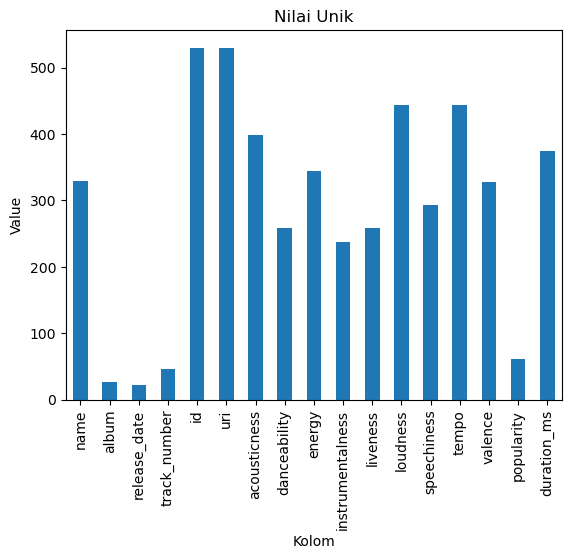

In [14]:
data_a.nunique().plot(kind='bar')
plt.title('Nilai Unik')
plt.xlabel('Kolom')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()

#### 5. Menemukan nilai null

In [16]:
data_a.isnull().sum()
# Nilai null tidak ditemukan sehingga tidak perlu replace nilai null

name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

#### 6. Lihat tipe data

In [18]:
data_a.dtypes

name                 object
album                object
release_date         object
track_number          int64
id                   object
uri                  object
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity            int64
duration_ms           int64
dtype: object

In [19]:
data_a['release_date'] = pd.to_datetime(data_a['release_date'], format='%Y-%m-%d')

In [20]:
data_a.dtypes

name                        object
album                       object
release_date        datetime64[ns]
track_number                 int64
id                          object
uri                         object
acousticness               float64
danceability               float64
energy                     float64
instrumentalness           float64
liveness                   float64
loudness                   float64
speechiness                float64
tempo                      float64
valence                    float64
popularity                   int64
duration_ms                  int64
dtype: object

#### 7. Buat box-plot

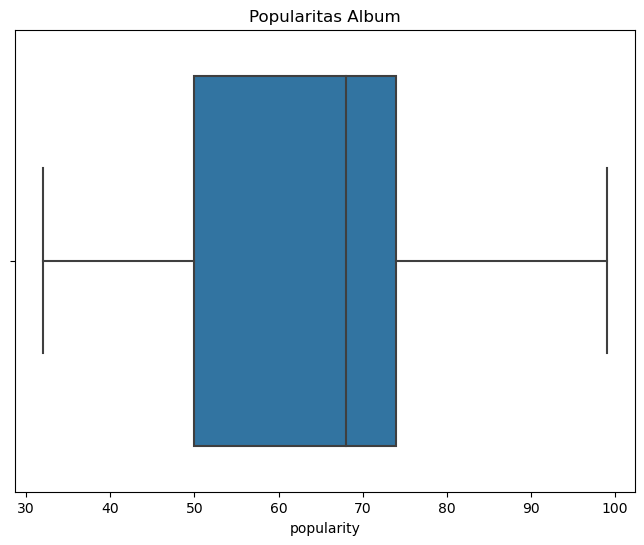

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_a['popularity'])
plt.title('Popularitas Album')
plt.show()
# Tidak ditemukan outlier pada kolom popularitas album

#### 8. Insight

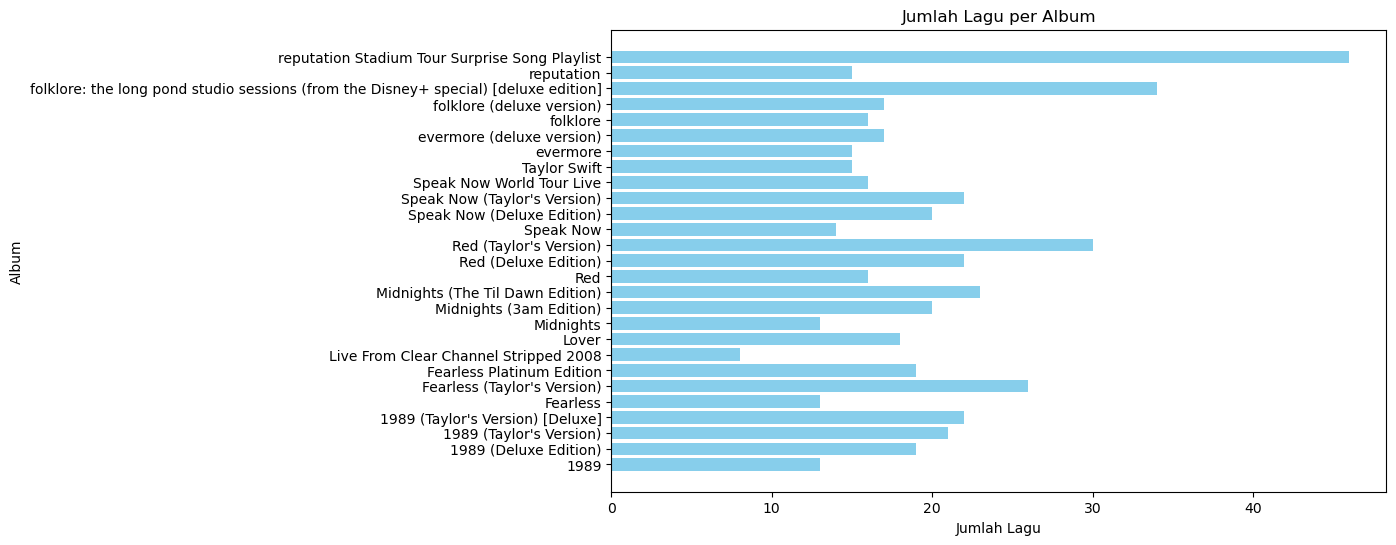

In [24]:
# Mengetahui jumlah lagu per album
jumlah_lagu_per_album = data_a.groupby('album')['name'].count().reset_index()
jumlah_lagu_per_album.columns = ['album', 'jumlah_lagu']
plt.figure(figsize=(10, 6))
plt.barh(jumlah_lagu_per_album['album'], jumlah_lagu_per_album['jumlah_lagu'], color='skyblue')
plt.xlabel('Jumlah Lagu')
plt.ylabel('Album')
plt.title('Jumlah Lagu per Album')
plt.show()


In [25]:
# Menghitung jumlah album yang dirilis dalam satu tahun
# Membuat kolom baru untuk mengetahui tahun rilis tiap album
data_a['release_year'] = pd.to_datetime(data_a['release_date']).dt.year
# Groupby album berdasarkan tahun rilis, buang nilai unik 
jumlah_album_per_tahun = data_a.groupby('release_year')['album'].nunique().reset_index()
jumlah_album_per_tahun

,release_year,album
0,2006,1
1,2008,3
2,2010,3
3,2012,2
4,2014,2
5,2017,2
6,2019,1
7,2020,4
8,2021,3
9,2022,2


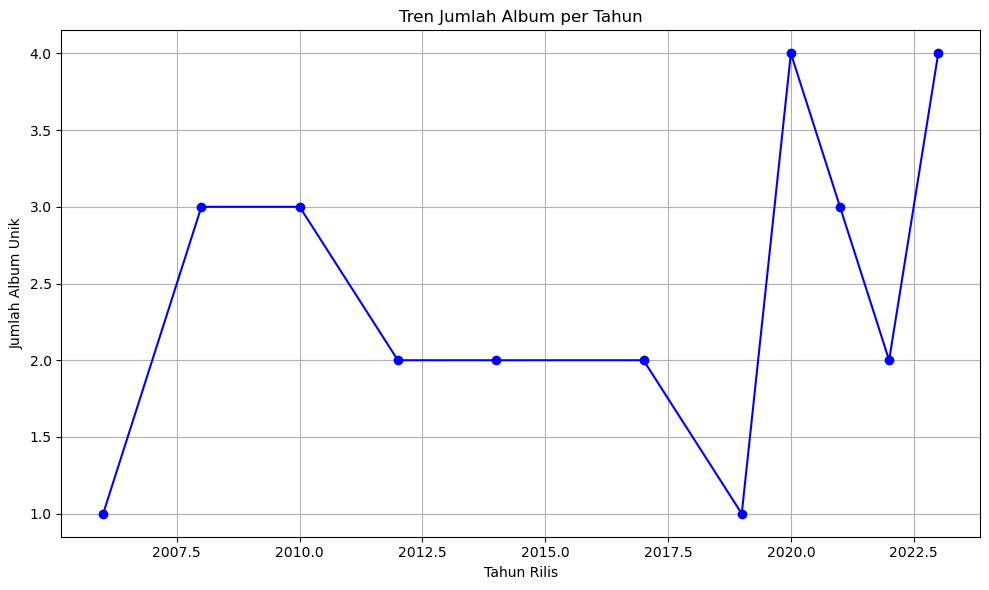

In [26]:
# Memvisualisasikan jumlah album yang di release tiap tahun
plt.figure(figsize=(10, 6))
plt.plot(jumlah_album_per_tahun['release_year'], jumlah_album_per_tahun['album'], marker='o', color='b')

plt.xlabel('Tahun Rilis')
plt.ylabel('Jumlah Album Unik')
plt.title('Tren Jumlah Album per Tahun')
plt.grid(True)
plt.tight_layout()
plt.show()